<a href="https://colab.research.google.com/github/SampMark/Computational-Thinking/blob/main/Probability_Calculation_part2_classical_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Distribuições de Probabilidade: Gaussiana (Normal), Uniforme e Exponencial**

Vamos explorar neste laboratório as três distribuições fundamentais em estatística e probabilidade: **Gaussiana (Normal)**, **Uniforme** e **Exponencial**. Cada uma delas tem propriedades matemáticas distintas e aplicações específicas em modelagem estatística, inferência e análise de dados.

### **Quando Usar Cada Distribuição?**
- **Gaussiana**: Quando o fenômeno é influenciado por muitos fatores pequenos e independentes (e.g., medições físicas).
- **Uniforme**: Quando todos os resultados são igualmente plausíveis (e.g., sorteio justo).
- **Exponencial**: Para modelar tempos de espera ou processos sem memória (e.g., tempo até falha).

### **Visualização**
- **Gaussiana**: histogramas com curva suave em forma de sino.
- **Uniforme**: histograma plano no intervalo $[a, b]$.
- **Exponencial**: decaimento rápido à direita, com cauda longa.

---

### **1. Distribuição Gaussiana (Normal)**
A distribuição Gaussiana é a mais conhecida e utilizada em estatística, frequentemente aplicada em fenômenos naturais, sociais e em inferência estatística devido ao **Teorema Central do Limite**.

#### **Função de Densidade de Probabilidade (FDP):**
$$
f(x | \mu, \sigma^2) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$
- **Parâmetros**:
  - $\mu$: Média (localização do pico).
  - $\sigma^2$: Variância (medida de dispersão).
  - $\sigma$: Desvio padrão.

- **Estimação dos parâmetros**:
  - $\hat{\mu} = \bar{x}$ (média amostral).
  - $\hat{\sigma}^2 = \frac{1}{n}\sum (x_i - \bar{x})^2$ (variância amostral).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

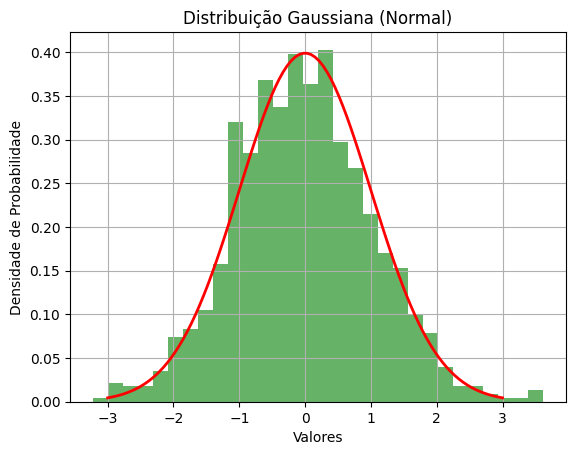

In [1]:
#Distribuição Gaussiana (Normal)
# Parâmetros da distribuição normal
mu = 0  # Média
sigma = 1  # Desvio padrão

# Gerar dados da distribuição normal
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Plotagem
plt.plot(x, y)
plt.title('Distribuição Gaussiana (Normal)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

#### **Propriedades**:
1. **Simetria**: A distribuição é simétrica em torno da média $\mu$.
2. **Curtose**: A curtose é 3 (mesocúrtica).
3. **Regra 68-95-99.7**:
   - 68% dos dados estão dentro de $\mu \pm \sigma$.
   - 95% dentro de $\mu \pm 2\sigma$.
   - 99.7% dentro de $\mu \pm 3\sigma$.
4. **Momentos**:
   - Média: $\mu$.
   - Variância: $\sigma^2$.
   - Assimetria: 0 (distribuição simétrica).

#### **Aplicações**:
- Modelagem de erros em medições.
- Altura de indivíduos em uma população.
- Retornos financeiros (sob certas condições).
- Base para testes estatísticos (e.g., testes Z e t).

#### **Exemplo Prático**:
Se a altura de adultos segue $N(170\, \text{cm}, 25)$, a probabilidade de alguém ter entre 165 cm e 175 cm é calculada usando a FDA (Função de Distribuição Acumulada).


    """
    Função para visualização de uma distribuição normal com cálculo
    de probabilidade usando a função de distribuição cumulativa (CDF).
    O exemplo usa uma distribuição de alturas com uma média de 170 cm e
    um desvio padrão de 5 cm.
    """

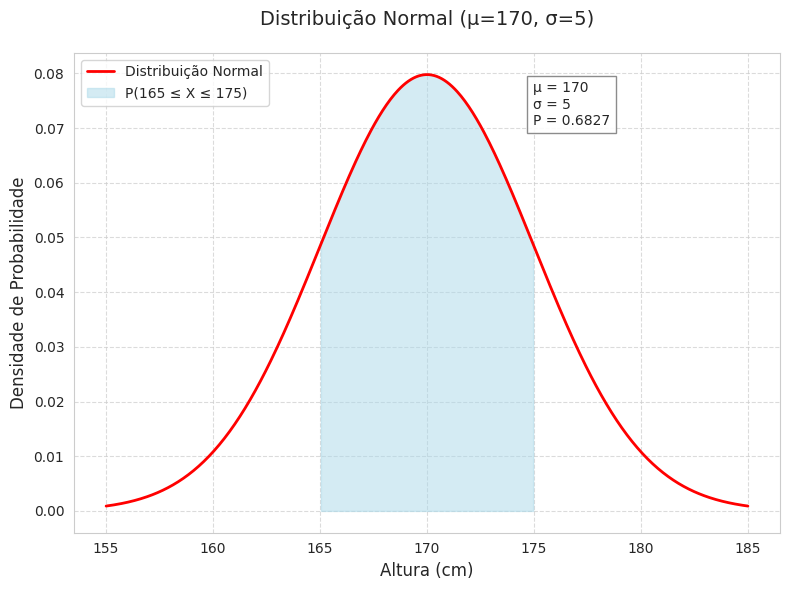

In [10]:
def plot_distribuicao_normal(mu=170, sigma=5, lim_inf=165, lim_sup=175, num_sigmas=3):
    """
    Plota uma distribuição normal e calcula a probabilidade de um valor estar em um intervalo específico.

    Parâmetros:
    -----------
    mu : float, opcional (padrão=170)
        Média da distribuição normal.
    sigma : float, opcional (padrão=5)
        Desvio padrão da distribuição (deve ser > 0).
    lim_inf : float, opcional (padrão=165)
        Limite inferior do intervalo de probabilidade.
    lim_sup : float, opcional (padrão=175)
        Limite superior do intervalo de probabilidade.
    num_sigmas : int, opcional (padrão=3)
        Número de desvios padrão para definir os limites do gráfico.

    Retorna:
    --------
    fig : matplotlib.figure.Figure
        Objeto da figura gerada.
    ax : matplotlib.axes.Axes
        Objeto dos eixos do gráfico.
    """
    # Validação de inputs
    if sigma <= 0:
        raise ValueError("O desvio padrão (sigma) deve ser maior que 0.")

    if lim_inf >= lim_sup:
        raise ValueError("lim_inf deve ser menor que lim_sup.")

    # Configuração de estilo
    sns.set_style("whitegrid")
    plt.rcParams['font.family'] = 'DejaVu Sans'

    # Criação da figura
    fig, ax = plt.subplots(figsize=(8, 6))

    # Cálculo do intervalo de visualização
    x_min = mu - num_sigmas * sigma
    x_max = mu + num_sigmas * sigma
    x = np.linspace(x_min, x_max, 500)
    y = norm.pdf(x, loc=mu, scale=sigma)

    # Plotagem da distribuição
    ax.plot(x, y, color='red', linewidth=2, label='Distribuição Normal')

    # Destaque da área de probabilidade
    mask = (x >= lim_inf) & (x <= lim_sup)
    ax.fill_between(x, y, where=mask, color='#abd9e9', alpha=0.5,
                   label=f'P({lim_inf} ≤ X ≤ {lim_sup})')

    # Cálculo da probabilidade
    prob = norm.cdf(lim_sup, loc=mu, scale=sigma) - norm.cdf(lim_inf, loc=mu, scale=sigma)

    # Anotações
    ax.text(0.65, 0.85,
           f'μ = {mu}\nσ = {sigma}\nP = {prob:.4f}',
           transform=ax.transAxes,
           bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))

    # Elementos gráficos
    ax.set_title(f'Distribuição Normal (μ={mu}, σ={sigma})', fontsize=14, pad=20)
    ax.set_xlabel('Altura (cm)', fontsize=12)
    ax.set_ylabel('Densidade de Probabilidade', fontsize=12)
    ax.legend(loc='upper left', frameon=True)

    # Grade personalizada
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)

    # Ajustes finais
    plt.tight_layout()
    return fig, ax

# Exemplo de uso
if __name__ == "__main__":
    fig, ax = plot_distribuicao_normal()
    plt.show()



---


### **2. Distribuição Uniforme**
A distribuição Uniforme descreve eventos onde todos os resultados são igualmente prováveis. Pode ser **contínua** ou **discreta**.

#### **FDP (Uniforme Contínua)**:
$$
f(x | a, b) = \begin{cases}
\frac{1}{b - a} & \text{se } a \leq x \leq b, \\
0 & \text{caso contrário}.
\end{cases}
$$
- **Parâmetros**:
  - $a$: Limite inferior.
  - $b$: Limite superior.

- **Estimação dos parâmetros**:
  - $\hat{a} = \min(x_i)$, $\hat{b} = \max(x_i)$.

#### **Propriedades**:
1. **Média**: $\frac{a + b}{2}$.
2. **Variância**: $\frac{(b - a)^2}{12}$.
3. **Assimetria**: 0 (distribuição simétrica no intervalo $[a, b]$).
4. **Sem Memória**: A probabilidade é constante no intervalo.

#### **Aplicações**:
- Geração de números aleatórios em computação.
- Modelagem de eventos com probabilidade constante (e.g., sorteio de loteria).
- Simulações de Monte Carlo.

#### **Exemplo**:
Um dado justo tem distribuição uniforme discreta com $a = 1$, $b = 6$.


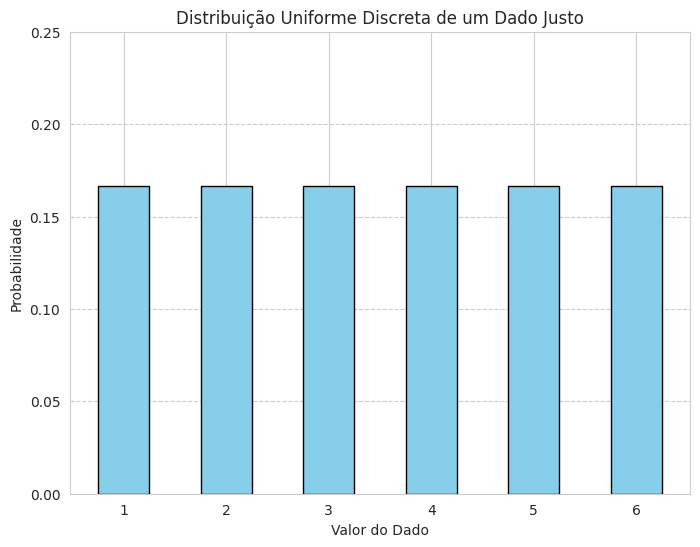

In [13]:
# Dados para a distribuição uniforme discreta de um dado justo
a = 1  # Limite inferior
b = 6  # Limite superior
valores = range(a, b + 1)
probabilidades = [1/len(valores)] * len(valores)

# Plotagem da distribuição
plt.figure(figsize=(8, 6))
plt.bar(valores, probabilidades, width=0.5, color='skyblue', edgecolor='black')
plt.xlabel('Valor do Dado')
plt.ylabel('Probabilidade')
plt.title('Distribuição Uniforme Discreta de um Dado Justo')
plt.xticks(valores)
plt.ylim(0, 0.25) #Ajustar o eixo y para melhor visualização
plt.grid(axis='y', linestyle='--')
plt.show()




---



### **3. Distribuição Exponencial**
A distribuição Exponencial modela o tempo entre eventos em um processo de Poisson (eventos independentes com taxa constante).

#### **FDP**:
$$
f(x | \lambda) = \begin{cases}
\lambda e^{-\lambda x} & \text{se } x \geq 0, \\
0 & \text{caso contrário}.
\end{cases}
$$
- **Parâmetro**:
  - $\lambda$: Taxa de ocorrência ($\lambda > 0$)
- **Estimação de Parâmetros**:
  - $\hat{\lambda} = \frac{1}{\bar{x}}$

#### **Propriedades**:
1. **Média**: $\frac{1}{\lambda}$
2. **Variância**: $\frac{1}{\lambda^2}$
3. **Assimetria**: 2 (assimetria positiva)
4. **Sem Memória**: $P(X > s + t | X > s) = P(X > t)$, ou seja, o passado não influencia o futuro.

#### **Aplicações**:
- Tempo de vida de componentes eletrônicos.
- Tempo entre chegadas em filas de espera.
- Modelagem de falhas em sistemas (confiabilidade).

#### **Exemplo**:
Se o tempo médio entre falhas de um servidor é 100 horas ($\lambda = 0.01$), a probabilidade de sobreviver mais 50 horas é $e^{-0.01 \times 50} \approx 0.6065$.


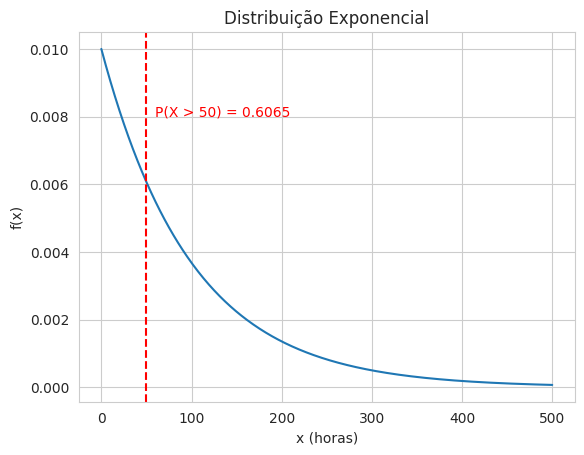

In [14]:
# Parâmetros da distribuição exponencial
lambda_param = 0.01  # Taxa de ocorrência (1/tempo médio entre falhas)
x = np.linspace(0, 500, 500)  # Valores de x para plotar a função de densidade de probabilidade
y = lambda_param * np.exp(-lambda_param * x)

# Plotagem
plt.plot(x, y)
plt.title('Distribuição Exponencial')
plt.xlabel('x (horas)')
plt.ylabel('f(x)')
plt.grid(True)

# Probabilidade de sobreviver mais de 50 horas
t = 50
probabilidade = np.exp(-lambda_param * t)
plt.axvline(x=t, color='r', linestyle='--') # Linha vertical no ponto t
plt.text(t + 10, 0.008, f'P(X > {t}) = {probabilidade:.4f}', color='red')

plt.show()

### **Comparação entre as Distribuições**

| **Característica**       | **Gaussiana**               | **Uniforme**                | **Exponencial**             |
|--------------------------|-----------------------------|-----------------------------|-----------------------------|
| **Forma**                | Simétrica, em forma de sino | Retangular                  | Assimétrica positiva        |
| **Parâmetros**           | $\mu$, $\sigma^2$       | $a$, $b$                | $\lambda$                 |
| **Suporte**              | $-\infty < x < \infty$    | $a \leq x \leq b$         | $x \geq 0$                |
| **Curtose**              | 3 (mesocúrtica)             | -1.2 (platicúrtica)         | 6 (leptocúrtica)            |
| **Aplicação Típica**     | Fenômenos naturais          | Eventos equiprováveis       | Tempo entre eventos         |
| **Momento de Ordem 3**   | 0 (simétrica)               | 0 (simétrica no intervalo)  | Positivo (assimetria)       |

---

### **4. Relações e Aproximações**
1. **Teorema Central do Limite**:
   - A soma de muitas variáveis independentes tende a uma distribuição Normal, independentemente da distribuição original.
2. **Exponencial e Poisson**:
   - Se eventos ocorrem com taxa $\lambda$ em um processo de Poisson, o tempo entre eventos segue uma Exponencial($\lambda$).
3. **Uniforme e Outras Distribuições**:
   - A distribuição Uniforme é usada para gerar amostras de outras distribuições via transformações (e.g., método da transformação inversa).

Para explorar mais, estude casos de uso específicos e **[experimente simulações computacionais](https://dev-mind.blog/apps/board/)**!